# Model 2: Skin Age Detection

In [1]:
# Install package
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# Import libraries
import os
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

In [3]:
# kaggle: {"username":"tasyafaadhafebrianne","key":"c823b708912a81e0fa4c05afc14229aa"}

od.download('https://www.kaggle.com/datasets/tasyafaadhafebrianne/utkfacedataset', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tasyafaadhafebrianne
Your Kaggle Key: ··········


100%|██████████| 116M/116M [00:06<00:00, 18.4MB/s]


In [4]:
dataset_path = './utkfacedataset/dataset/'
data_files = os.listdir(dataset_path)

print("Name of Data: ", data_files[0])
print("Total Data: ", len(data_files))

Name of Data:  32_1_1_20170117182443477.jpg.chip.jpg
Total Data:  23703


In [5]:
images = []
ages = []
genders = []

for data in data_files:
  image = Image.open(dataset_path + data).convert("L") #grayscale mode
  image = image.resize((64,64))
  image = np.array(image).reshape((64,64,1))
  images.append(image)
  # Split ages and genders from data
  split = data.split('_')
  ages.append(split[0])
  genders.append(int(split[1]))

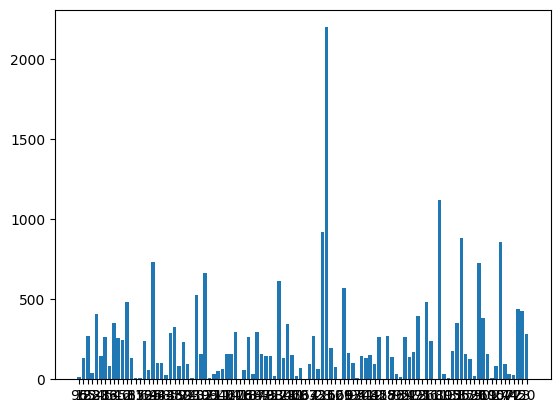

Maximum age:  99


In [6]:
# Data visualization
x = list(set(ages))
y = [ages.count(i) for i in x]
plt.bar(x, y)
plt.show()
print("Maximum age: ", max(ages))

Gender: 1 
Age: 11


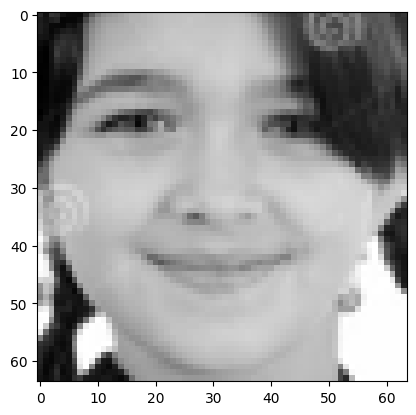

In [7]:
# Displaying a sample of image along with its gender and age
sample = images[100]
print("Gender:", genders[100], "\nAge:", ages[100])
plt.imshow(sample[:, :, 0], cmap='gray')
plt.show()

In [8]:
# Preprocessing image
size = len(images)
target = np.zeros((size, 2), dtype='float32') #2 colomns: age and gender
features = np.zeros((size, sample.shape[0], sample.shape[1], 1), dtype='float32')

for i in range(size):
    age = int(ages[i])
    if age >= 0 and age < 18:
        target[i, 0] = 1 / 4
    elif age >= 18 and age < 30:
        target[i, 0] = 2 / 4
    elif age >= 30 and age < 80:
        target[i, 0] = 3 / 4
    else:
        target[i, 0] = 1  # Assign age category

    target[i, 1] = int(genders[i])  # Assign gender
    features[i] = images[i]
 
features = features / 255  # Normalization

In [9]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)
print("Training images:", x_train.shape[0])
print("Testing images:", x_test.shape[0])
print("Shape of image:", sample.shape)

Training images: 18962
Testing images: 4741
Shape of image: (64, 64, 1)


In [28]:
'''
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(sample.shape[0], sample.shape[1], 1)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()
'''

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 256)      

In [29]:
# history = model.fit(features, target, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
297/297 [==============================] - 21s 64ms/step - loss: 0.2504 - accuracy: 0.3284 - val_loss: 0.1529 - val_accuracy: 0.3728
Epoch 2/100
297/297 [==============================] - 19s 62ms/step - loss: 0.1390 - accuracy: 0.3973 - val_loss: 0.1304 - val_accuracy: 0.4215
Epoch 3/100
297/297 [==============================] - 19s 63ms/step - loss: 0.1345 - accuracy: 0.4061 - val_loss: 0.1318 - val_accuracy: 0.4150
Epoch 4/100
297/297 [==============================] - 19s 63ms/step - loss: 0.1320 - accuracy: 0.4129 - val_loss: 0.1261 - val_accuracy: 0.4306
Epoch 5/100
297/297 [==============================] - 19s 64ms/step - loss: 0.1315 - accuracy: 0.4169 - val_loss: 0.1237 - val_accuracy: 0.4258
Epoch 6/100
297/297 [==============================] - 19s 63ms/step - loss: 0.1289 - accuracy: 0.4210 - val_loss: 0.1205 - val_accuracy: 0.4416
Epoch 7/100
297/297 [==============================] - 19s 63ms/step - loss: 0.1274 - accuracy: 0.4266 - val_loss: 0.1227 - val_ac

In [36]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [37]:
model.save('age_detection.h5')

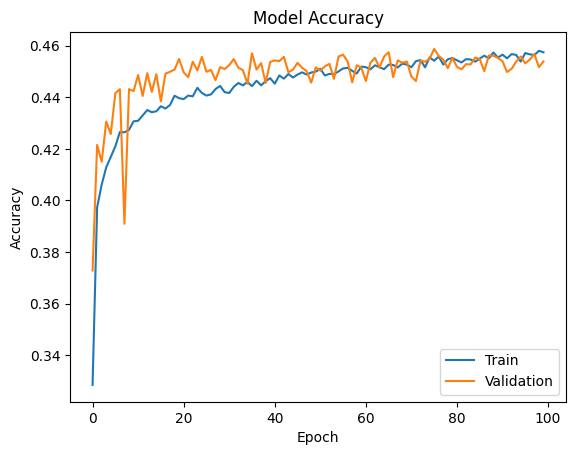

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=0)
plt.show()